In [1]:
from sklearn.base import BaseEstimator

In [2]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        import numpy as np
        pred = np.zeros((X.shape[0],1)) #X.shape[0] 행으로 필요함
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [3]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df 
def transform_features():
    import pandas as pd
    df = pd.read_csv('titanic_train.csv')
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df  

In [4]:
titanic_df = transform_features()

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


In [5]:
from sklearn.model_selection import train_test_split
X_df = titanic_df.drop(columns=['Survived'])
y_df = titanic_df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=11)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
my = MyDummyClassifier()
my.fit(X_train, y_train)
pred = my.predict(X_test)
accuracy_score(y_test, pred)

0.8324022346368715

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_test, pred)

array([[103,  15],
       [ 15,  46]], dtype=int64)

In [10]:
from sklearn.metrics import recall_score,precision_score

In [11]:
recall_score(y_test, pred)

0.7540983606557377

In [12]:
precision_score(y_test, pred)

0.7540983606557377

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [14]:
def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f} 정밀도:{precision:.4f} 재현율:{recall:.4f}')

In [15]:
get_clf_eval(y_test, pred)

오차행렬
[[103  15]
 [ 15  46]]
정확도:0.8324 정밀도:0.7541 재현율:0.7541


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
titanic_df = transform_features()
from sklearn.model_selection import train_test_split
X_df = titanic_df.drop(columns=['Survived'])
y_df = titanic_df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=11)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


In [18]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 정밀도:0.8246 재현율:0.7705


In [19]:
pred_proba = lr_clf.predict_proba(X_test)

In [20]:
pred_proba.shape

(179, 2)

In [21]:
pred[:3]

array([1, 0, 0], dtype=int64)

In [22]:
pred_proba[:3]

array([[0.44935228, 0.55064772],
       [0.86335513, 0.13664487],
       [0.86429645, 0.13570355]])

In [23]:
import numpy as np

In [24]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
pred_proba_result[:3]

array([[0.44935228, 0.55064772, 1.        ],
       [0.86335513, 0.13664487, 0.        ],
       [0.86429645, 0.13570355, 0.        ]])

In [25]:
from sklearn.preprocessing import Binarizer

In [26]:
X = [[1,-1,2],[2,0,0],[0,1.1,1.2]]

In [27]:
bi = Binarizer() # 임계값 조절

In [28]:
bi.fit_transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [29]:
bi = Binarizer(threshold=1.1)

In [30]:
bi.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [31]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 행은 전부 다 , 열은 두번째꺼만 > reshape으로 모양 조정
bi = Binarizer(threshold=custom_threshold)
custom_predict = bi.fit_transform(pred_proba_1)

In [32]:
get_clf_eval(y_test,custom_predict)
# 오차행렬
# [[108  10]
#  [ 14  47]]
# 정확도:0.8659 정밀도:0.8246 재현율:0.7705

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 정밀도:0.8246 재현율:0.7705


In [33]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 행은 전부 다 , 열은 두번째꺼만 > reshape으로 모양 조정
bi = Binarizer(threshold=custom_threshold)
custom_predict = bi.fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)
# 오차행렬
# [[108  10]
#  [ 14  47]]
# 정확도:0.8659 정밀도:0.8246 재현율:0.7705

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212 정밀도:0.7042 재현율:0.8197


In [34]:
custom_threshold = 0.6
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 행은 전부 다 , 열은 두번째꺼만 > reshape으로 모양 조정
bi = Binarizer(threshold=custom_threshold)
custom_predict = bi.fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)
# 오차행렬
# [[108  10]
#  [ 14  47]]
# 정확도:0.8659 정밀도:0.8246 재현율:0.7705

오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771 정밀도:0.8980 재현율:0.7213


In [35]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,threshold):
    for threshold in thresholds:
        bi = Binarizer(threshold=threshold)
        custom_predict = bi.fit_transform(pred_proba_c1)
        get_clf_eval(y_test,custom_predict)

In [36]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212 정밀도:0.7042 재현율:0.8197
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547 정밀도:0.7869 재현율:0.7869
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 정밀도:0.8246 재현율:0.7705
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715 정밀도:0.8654 재현율:0.7377
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771 정밀도:0.8980 재현율:0.7213


In [37]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 딸느 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [39]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축 y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.show()

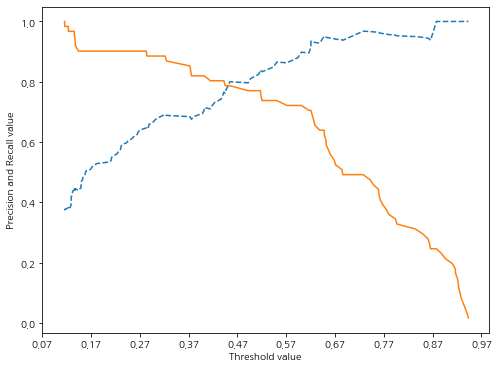

In [40]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [41]:
from sklearn.metrics import f1_score

In [43]:
f1_score(y_test,pred)

0.7966101694915254

In [48]:
def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f} 정밀도:{precision:.4f} 재현율:{recall:.4f} f1:{f1:.4f}')

In [49]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212 정밀도:0.7042 재현율:0.8197 f1:0.7576
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547 정밀도:0.7869 재현율:0.7869 f1:0.7869
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 정밀도:0.8246 재현율:0.7705 f1:0.7966
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715 정밀도:0.8654 재현율:0.7377 f1:0.7965
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771 정밀도:0.8980 재현율:0.7213 f1:0.8000


In [50]:
from sklearn.metrics import roc_curve

In [57]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)

In [58]:
thr_index = np.arange(1, thresholds.shape[0],5)
thr_index

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])

In [60]:
np.round(thresholds[thr_index],2)

array([0.94, 0.73, 0.62, 0.52, 0.44, 0.28, 0.15, 0.14, 0.13, 0.12])

In [61]:
np.round(fprs[thr_index],3)

array([0.   , 0.008, 0.025, 0.076, 0.127, 0.254, 0.576, 0.61 , 0.746,
       0.847])

In [62]:
np.round(tprs[thr_index],3)

array([0.016, 0.492, 0.705, 0.738, 0.803, 0.885, 0.902, 0.951, 0.967,
       1.   ])

In [66]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, threshold = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--', label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()

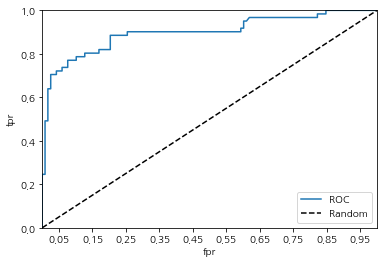

In [67]:
roc_curve_plot(y_test,pred_proba_class1)

In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
roc_auc_score(y_test,pred_proba_class1)

0.8986524034454015

In [70]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f} 정밀도:{precision:.4f} 재현율:{recall:.4f} f1:{f1:.4f} AUC:{roc_auc:.4f}')